# Lab 7- Data Analysis

In this lab, you download and begin to look at a particle physics dataset. You must download the dataset by March 17th. Exercises 1-4 are to be completed by March 21th. The remaider of the lab is due March 29th. Before leaving lab today, I suggest everyone downloads the dataset.

## Exercise 1: Reading

### HiggsML
In 2014, some of my colleagues from the ATLAS experiment put together a Higgs Machine Learning Challenge, which was hosted on [Kaggle](https://www.kaggle.com). Please read sections 1 and 3 (skip/skim 2) of [The HiggsML Technical Documentation](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf). 

Kaggle is a platform for data science competitions, with cash awards for winners. Kaggle currently hosts over 50,000 public datasets and associated competitions. Later in the course we will look at a variety of problems hosted on Kaggle and similar platforms. 

### SUSY Dataset

For the next few labs we will use datasets used in the [first paper on Deep Learning in High Energy physics](https://arxiv.org/pdf/1402.4735.pdf). Please read up to the "Deep Learning" section (end of page 5). This paper demonstrates that Deep Neural Networks can learn from raw data the features that are typically used by physicists for searches for exotics particles. The authors provide the data they used for this paper. They considered two benchmark scenarios: Higgs and SUSY.

## Exercise 2: Download SUSY Dataset

The information about the dataset can be found at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). We'll start with the [SUSY Dataset](https://archive.ics.uci.edu/ml/datasets/SUSY). 

### Download
In a terminal, download the data directly from the source and then decompress it. For example:

* To download:
    * On Mac OS: 
    `curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz`

    * In linux:
    `wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz`

* To uncompress:
`gunzip SUSY.csv.gz`

In [1]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  574k    0  574k    0     0  1045k      0 --:--:-- --:--:-- --:--:-- 1048k
100 42.4M    0 42.4M    0     0  27.2M      0 --:--:--  0:00:01 --:--:-- 27.3M
100 88.3M    0 88.3M    0     0  34.8M      0 --:--:--  0:00:02 --:--:-- 34.8M
100  140M    0  140M    0     0  39.4M      0 --:--:--  0:00:03 --:--:-- 39.4M
100  170M    0  170M    0     0  37.6M      0 --:--:--  0:00:04 --:--:-- 37.6M
100  225M    0  225M    0     0  40.6M      0 --:--:--  0:00:05 --:--:-- 45.0M
100  280M    0  280M    0     0  42.9M      0 --:--:--  0:00:06 --:--:-- 47.8M
100  333M    0  333M    0     0  44.2M      0 --:--:--  0:00:07 --:--:-- 48.9M
100  383M    0  383M    0     0  44.9M      0 --:--:--  0:00:08 --:--:-- 48.8M
100  433M    0  433M    0     0  45.4M      0 --:--

In [2]:
!rm SUSY.csv

rm: cannot remove 'SUSY.csv': No such file or directory


In [3]:
!gunzip SUSY.csv.gz

'gunzip' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
ls -lh

 Volume in drive C has no label.
 Volume Serial Number is E8AC-1FC1

 Directory of c:\Users\mahee\Downloads\Turza data lab\lab 7.75



File Not Found


The data is provided as a comma separated file.

In [5]:
filename="SUSY.csv"
# print out the first 5 lines using unix head command
!head -5  "SUSY.csv"

head: cannot open 'SUSY.csv' for reading: No such file or directory


## Reducing the dataset

This is a rather large dataset. If you have trouble loading it, we can easily make a new file with less data.

Here we look at the size of the data

In [6]:
!ls -lh

total 883M
-rw-r--r-- 1 mahee mahee 2.6M May  5 18:17 Lab.7.ipynb
-rw-r--r-- 1 mahee mahee 880M May  6 21:07 SUSY.csv.gz


We see that we have 5 million datapoints.

In [7]:
!wc -l SUSY.csv

wc: SUSY.csv: No such file or directory


We create a new file of the first half million. This is sufficient for our needs in this lab:

In [8]:
!head -500000 SUSY.csv > SUSY-small.csv

head: cannot open 'SUSY.csv' for reading: No such file or directory


In [9]:
ls -lh

 Volume in drive C has no label.
 Volume Serial Number is E8AC-1FC1

 Directory of c:\Users\mahee\Downloads\Turza data lab\lab 7.75



File Not Found


In [10]:
! wc -l SUSY-small.csv

0 SUSY-small.csv


Use this file for the rest of the lab to make this run faster.

### First Look

Each row represents a LHC collision event. Each column contains some observable from that event. The variable names are ([based on documentation](https://archive.ics.uci.edu/ml/datasets/SUSY)):

In [11]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

Some of these variables represent the "raw" kinematics of the observed final state particles, while others are "features" that are derived from these raw quantities:

In [12]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [13]:
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [14]:
FeatureNames

['dPhi_r_b',
 'M_R',
 'M_Delta_R',
 'MET_rel',
 'cos_theta_r1',
 'M_TR_2',
 'S_R',
 'R',
 'axial_MET',
 'MT2']

We will use pandas to read in the file, and matplotlib to make plots. The following ensures pandas is installed and sets everything up:

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now we can read the data into a pandas dataframe:

In [20]:
filename = "SUSY.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

You can see the data in Jupyter by just evaluateing the dataframe:

In [21]:
df

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,1.0,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599
4999996,0.0,0.951581,0.139370,1.436884,0.880440,-0.351948,-0.740852,0.290863,-0.732360,0.001360,0.257738,0.802871,0.545319,0.602730,0.002998,0.748959,0.401166,0.443471,0.239953
4999997,0.0,0.840389,1.419162,-1.218766,1.195631,1.695645,0.663756,0.490888,-0.509186,0.704289,0.045744,0.825015,0.723530,0.778236,0.752942,0.838953,0.614048,1.210595,0.026692
4999998,1.0,1.784218,-0.833565,-0.560091,0.953342,-0.688969,-1.428233,2.660703,-0.861344,2.116892,2.906151,1.232334,0.952444,0.685846,0.000000,0.781874,0.676003,1.197807,0.093689


The first column stores the "truth" label of whether an event was signal or not. Pandas makes it easy to create dataframes that store only the signal or background events:

In [22]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

The following example plots the signal and background distributions of every variable. Note that we use VarNames[1:] to skip the first variable, which was the true label.

l_1_pT


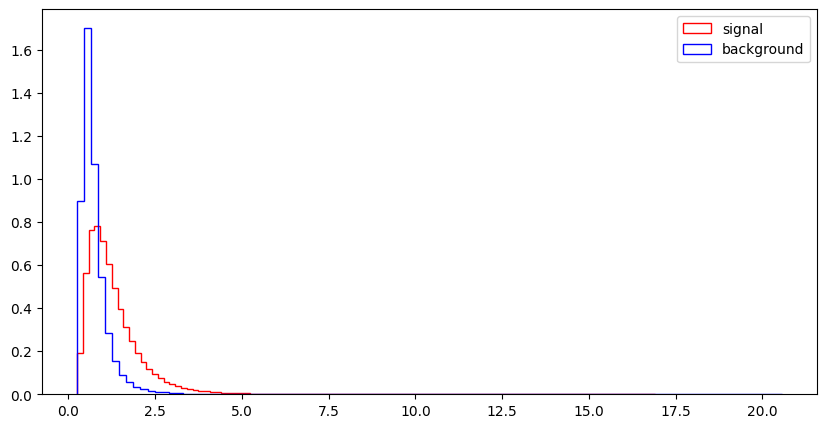

l_1_eta


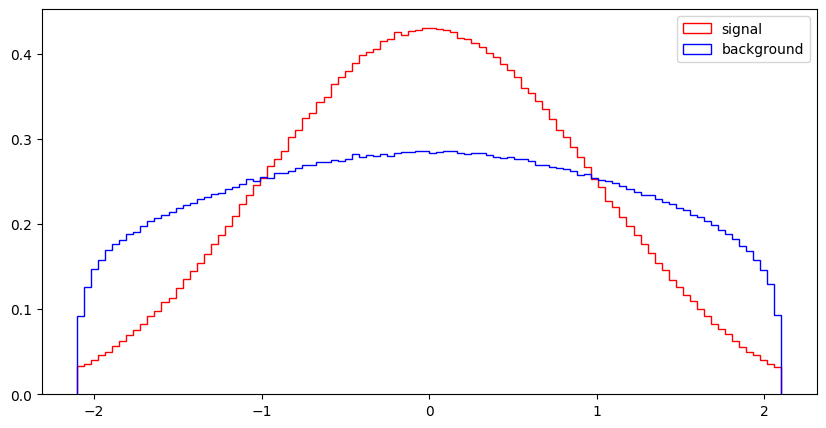

l_1_phi


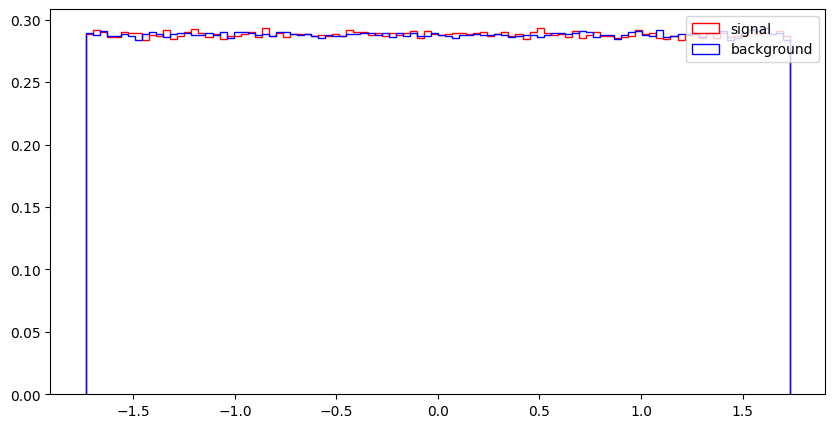

l_2_pT


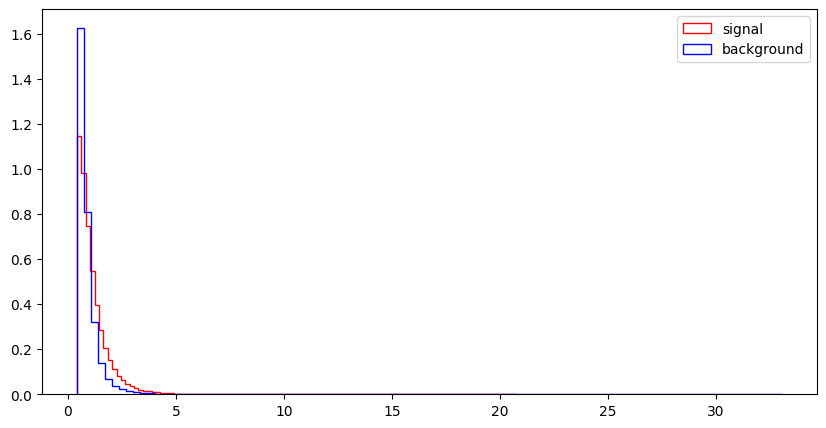

l_2_eta


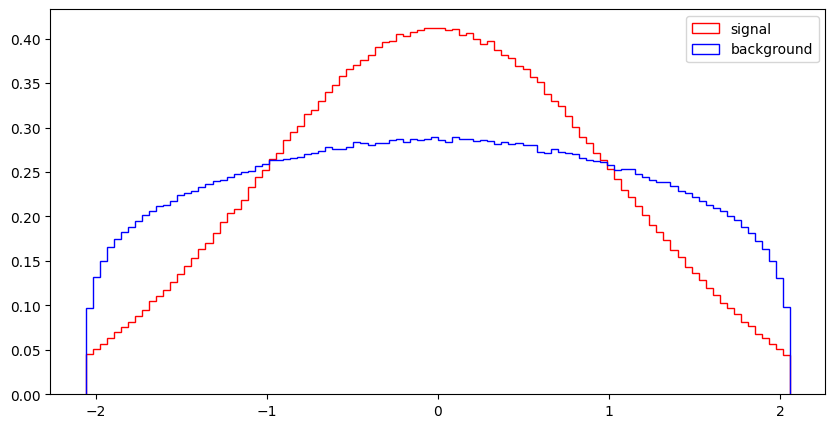

l_2_phi


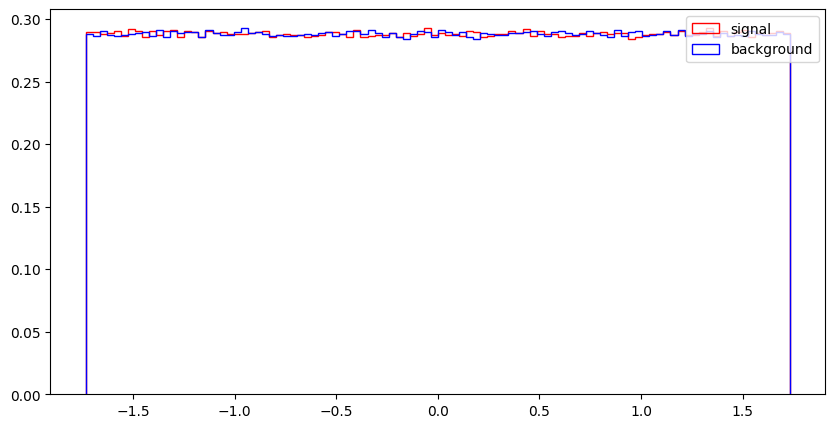

MET


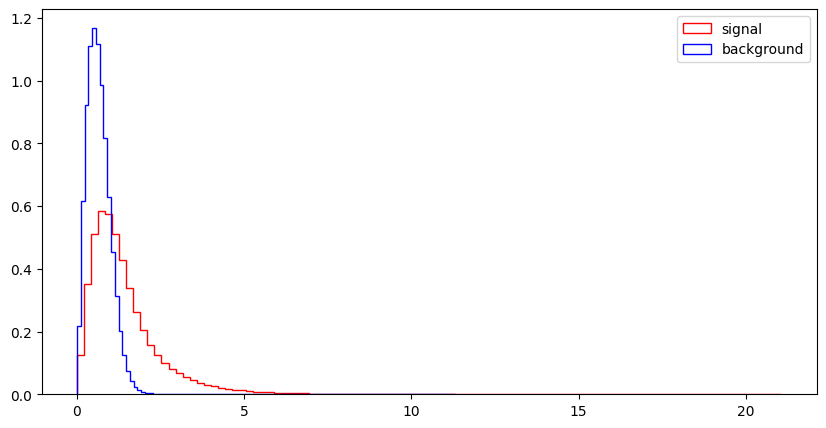

MET_phi


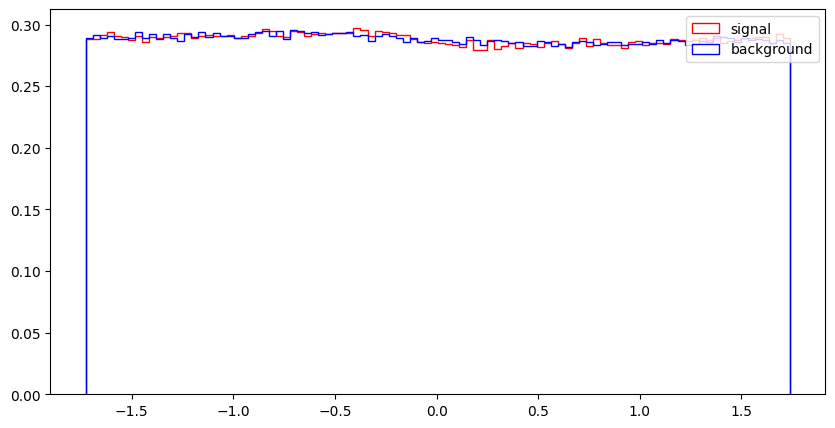

MET_rel


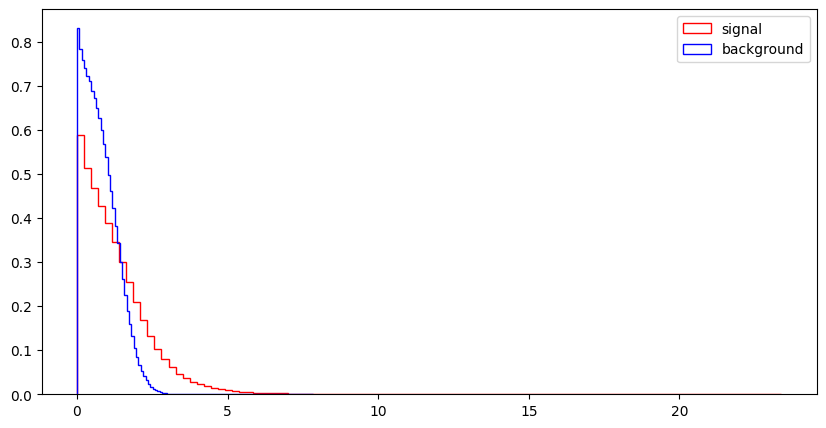

axial_MET


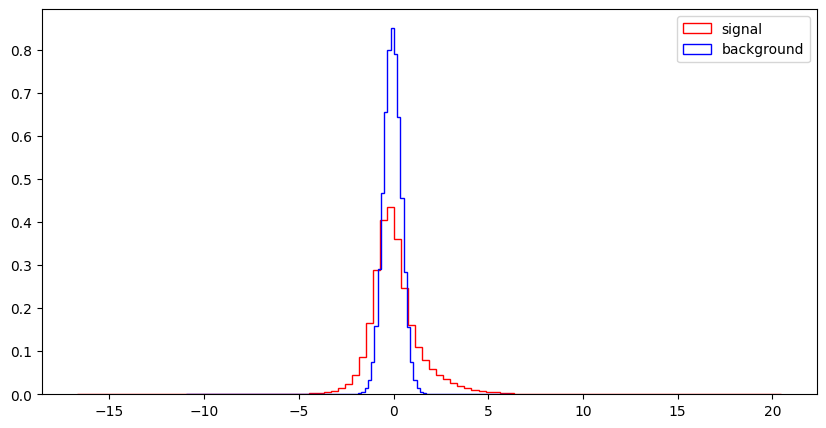

M_R


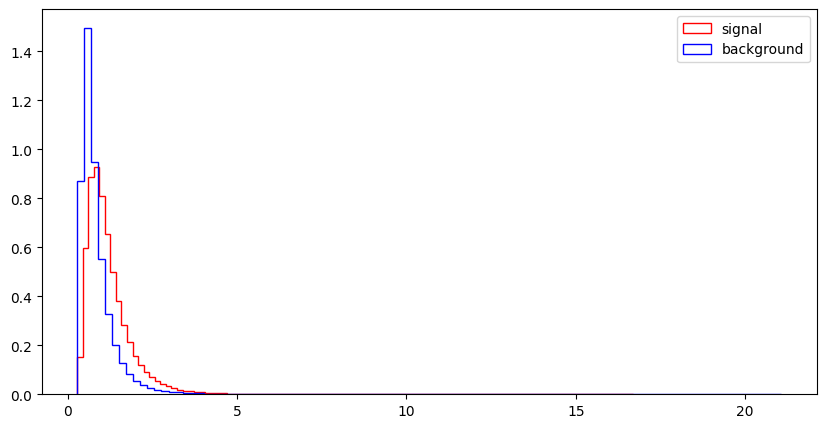

M_TR_2


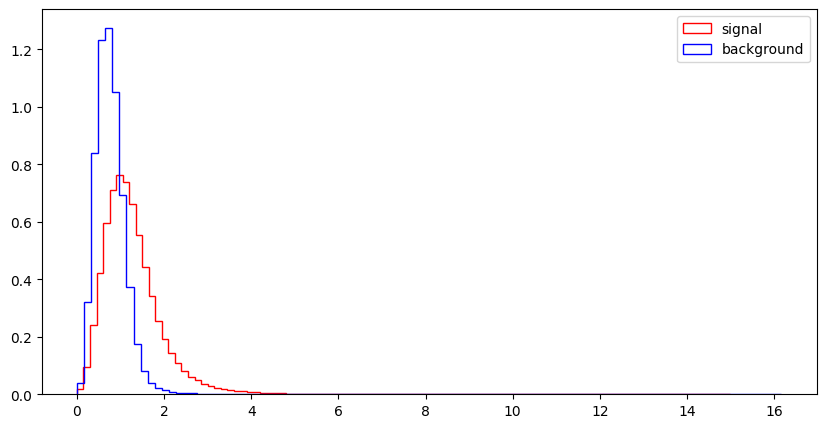

R


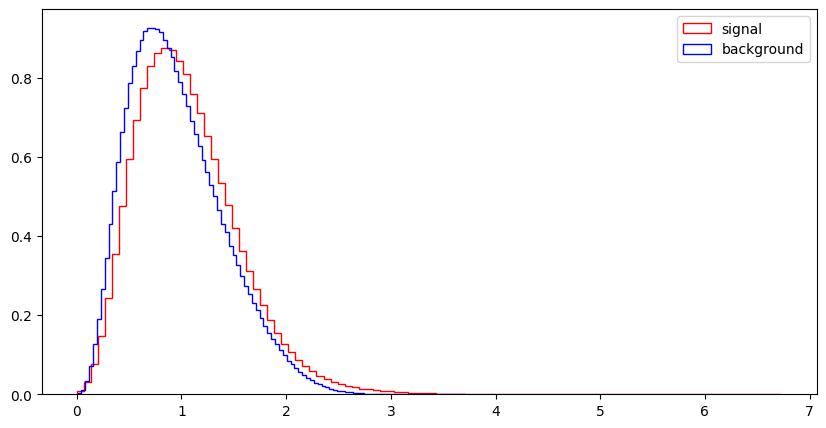

MT2


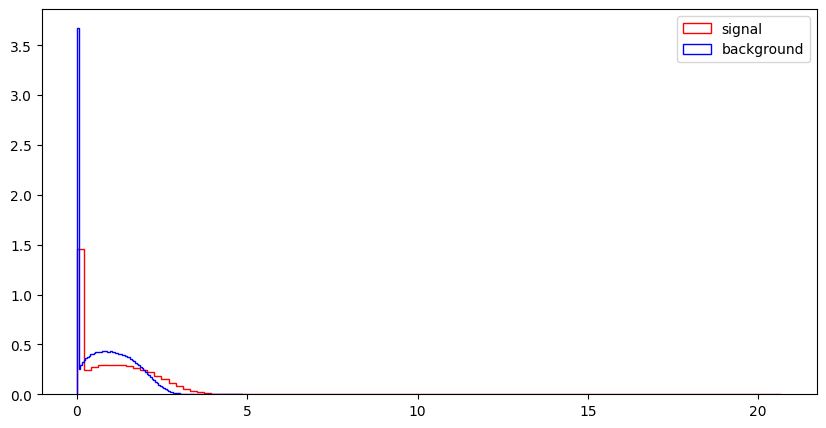

S_R


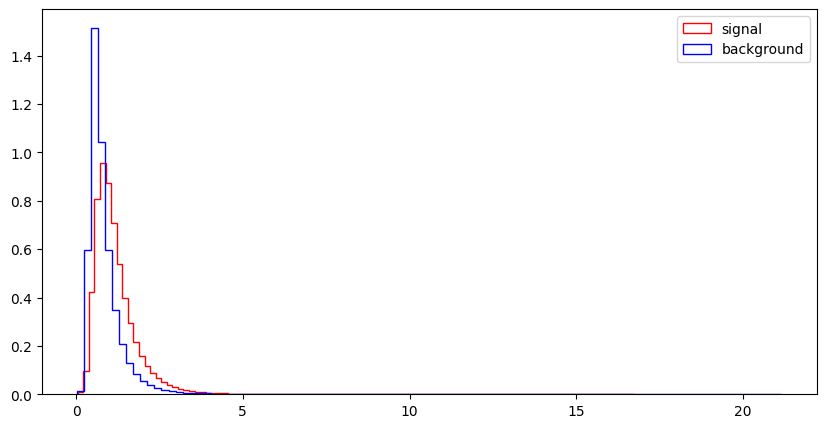

M_Delta_R


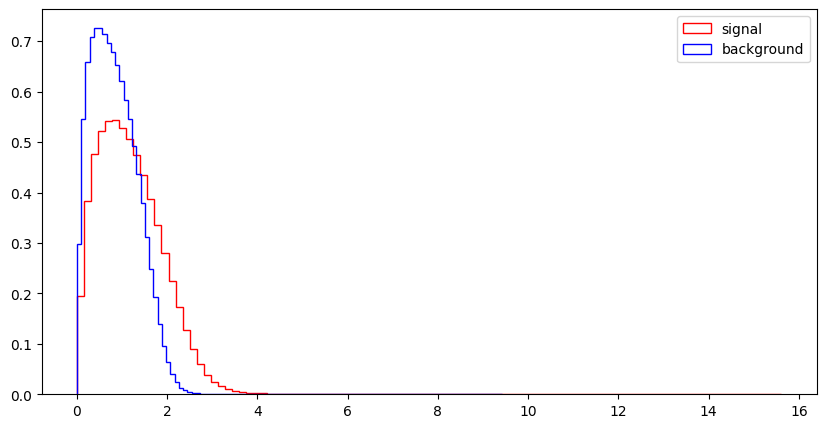

dPhi_r_b


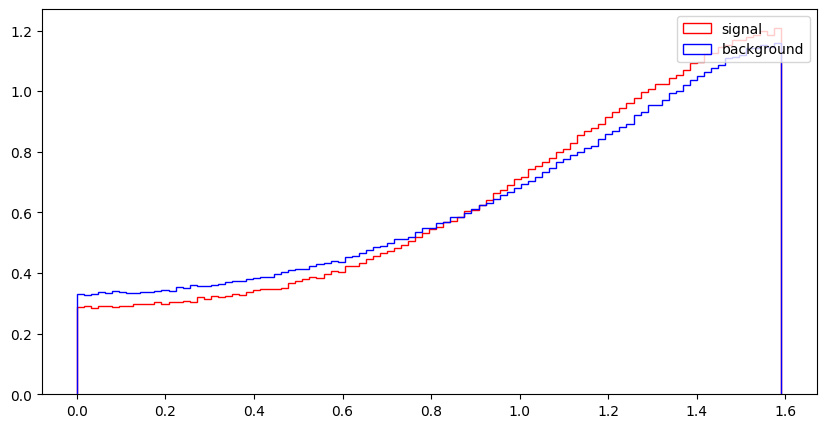

cos_theta_r1


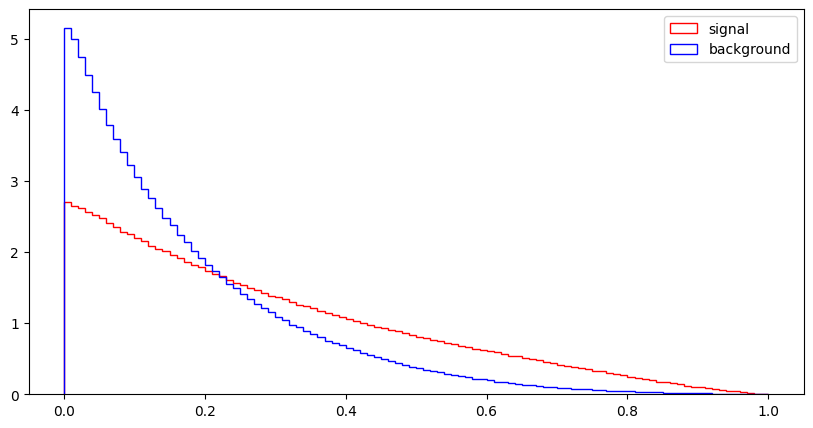

In [23]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

## Exercise 3: Make nice figures

Now use `matplotlib` to reproduce as closely as you can figures 5 and 6 from the paper. This exercise is intended to get you to familiarize yourself with making nicely formatted `matplotlib` figures with multiple plots. Note that the plots in the paper are actually wrong!

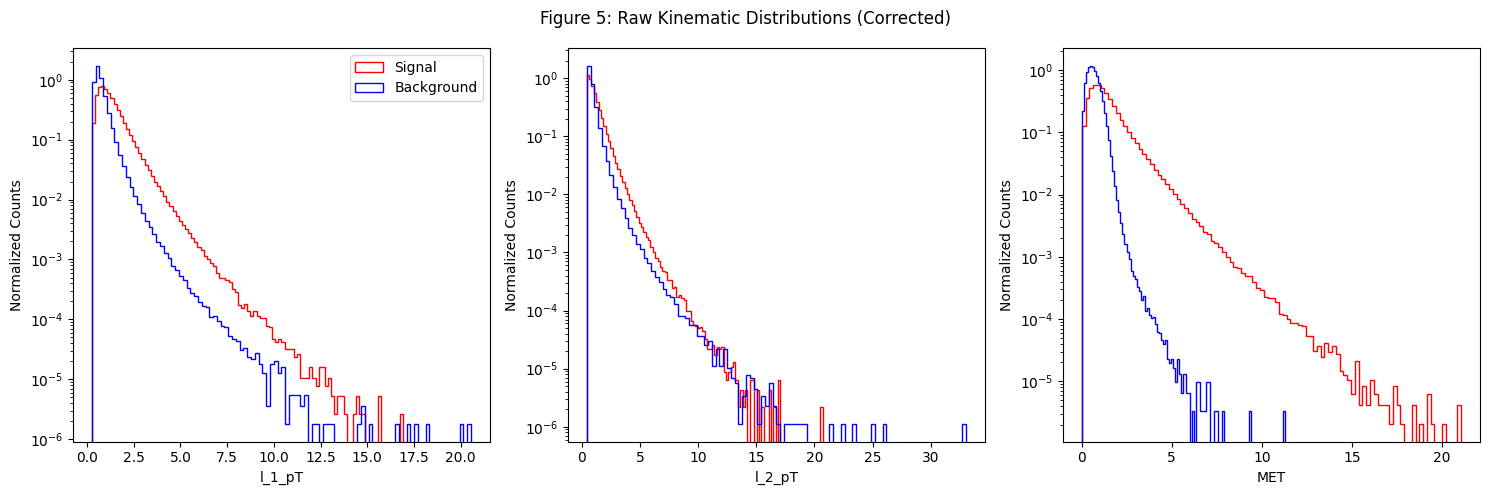

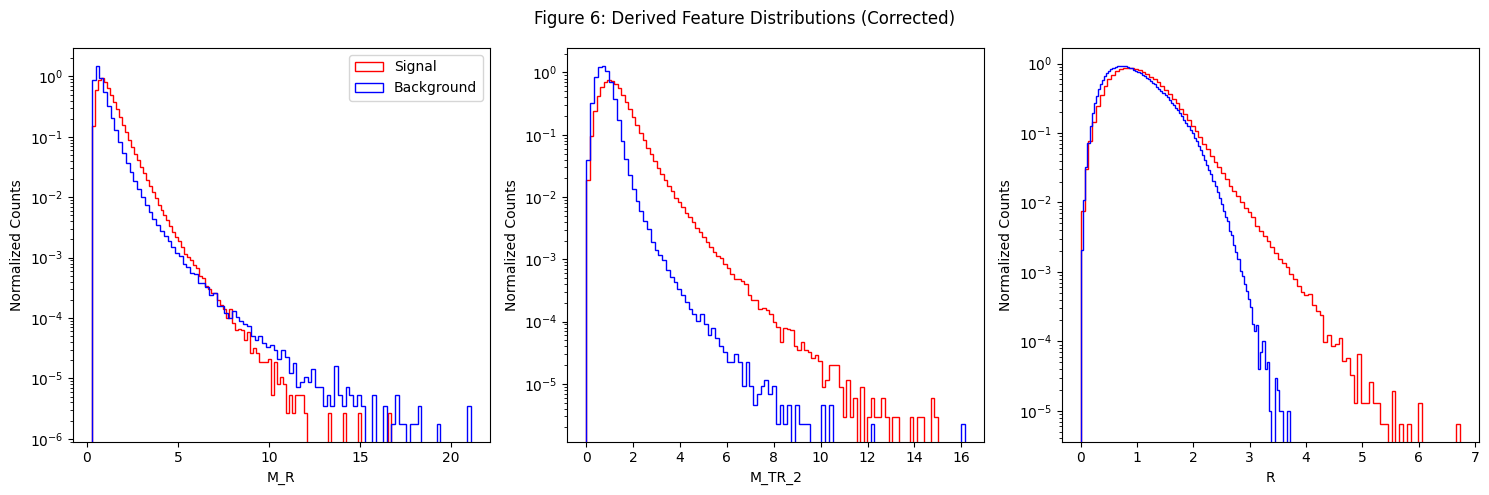

In [24]:
def reproduce_paper_figures():
    # Figure 5: Compare raw kinematic distributions
    raw_vars = ["l_1_pT", "l_2_pT", "MET"]
    
    plt.figure(figsize=(15, 5))
    for i, var in enumerate(raw_vars, 1):
        plt.subplot(1, 3, i)
        plt.hist(df_sig[var], bins=100, histtype='step', color='red', density=True, label='Signal')
        plt.hist(df_bkg[var], bins=100, histtype='step', color='blue', density=True, label='Background')
        plt.xlabel(var)
        plt.ylabel('Normalized Counts')
        plt.yscale('log')
        if i == 1:
            plt.legend()
    plt.suptitle("Figure 5: Raw Kinematic Distributions (Corrected)")
    plt.tight_layout()
    plt.show()
    
    # Figure 6: Compare derived feature distributions
    feature_vars = ["M_R", "M_TR_2", "R"]
    
    plt.figure(figsize=(15, 5))
    for i, var in enumerate(feature_vars, 1):
        plt.subplot(1, 3, i)
        plt.hist(df_sig[var], bins=100, histtype='step', color='red', density=True, label='Signal')
        plt.hist(df_bkg[var], bins=100, histtype='step', color='blue', density=True, label='Background')
        plt.xlabel(var)
        plt.ylabel('Normalized Counts')
        plt.yscale('log')
        if i == 1:
            plt.legend()
    plt.suptitle("Figure 6: Derived Feature Distributions (Corrected)")
    plt.tight_layout()
    plt.show()

reproduce_paper_figures()

## Exercise 4: Correlation

### Exercise 4.1

#### Part a
Write a function that creates pair plots and use it to compare variables in the SUSY sample, separately for low and high-level features. Refer to Lecture 13 for details. Do not use `seaborn`.

#### Part b
Making these plots can be slow because creating each plot initiates a full loop over the data. Make at least one modification to your function in part a to speed it up. Can you propose a different method of creating histograms that would speed up making such pair plots?

#### Part c
Which observables appear to be best for separating signal from background?

### Part a

Pair plot for raw variables:


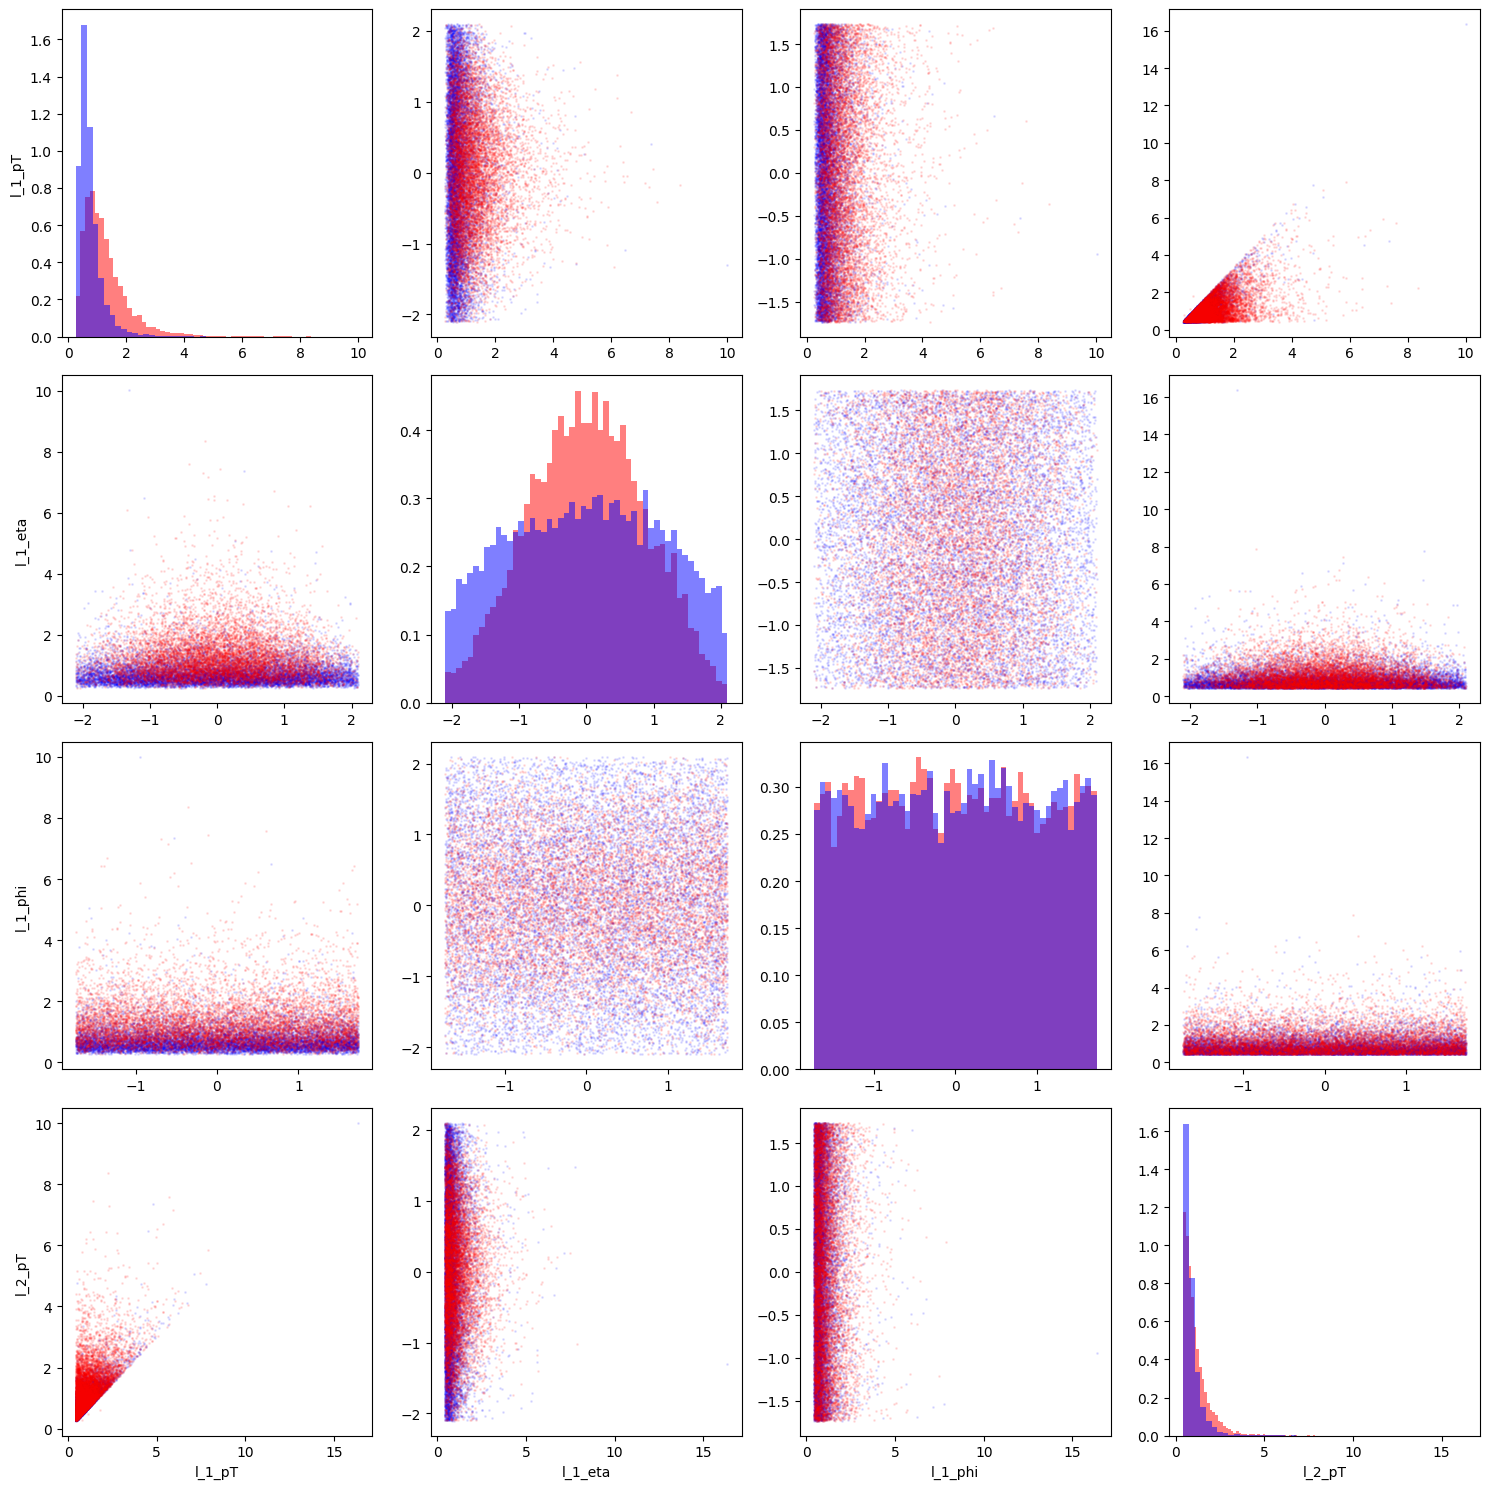

Pair plot for derived features:


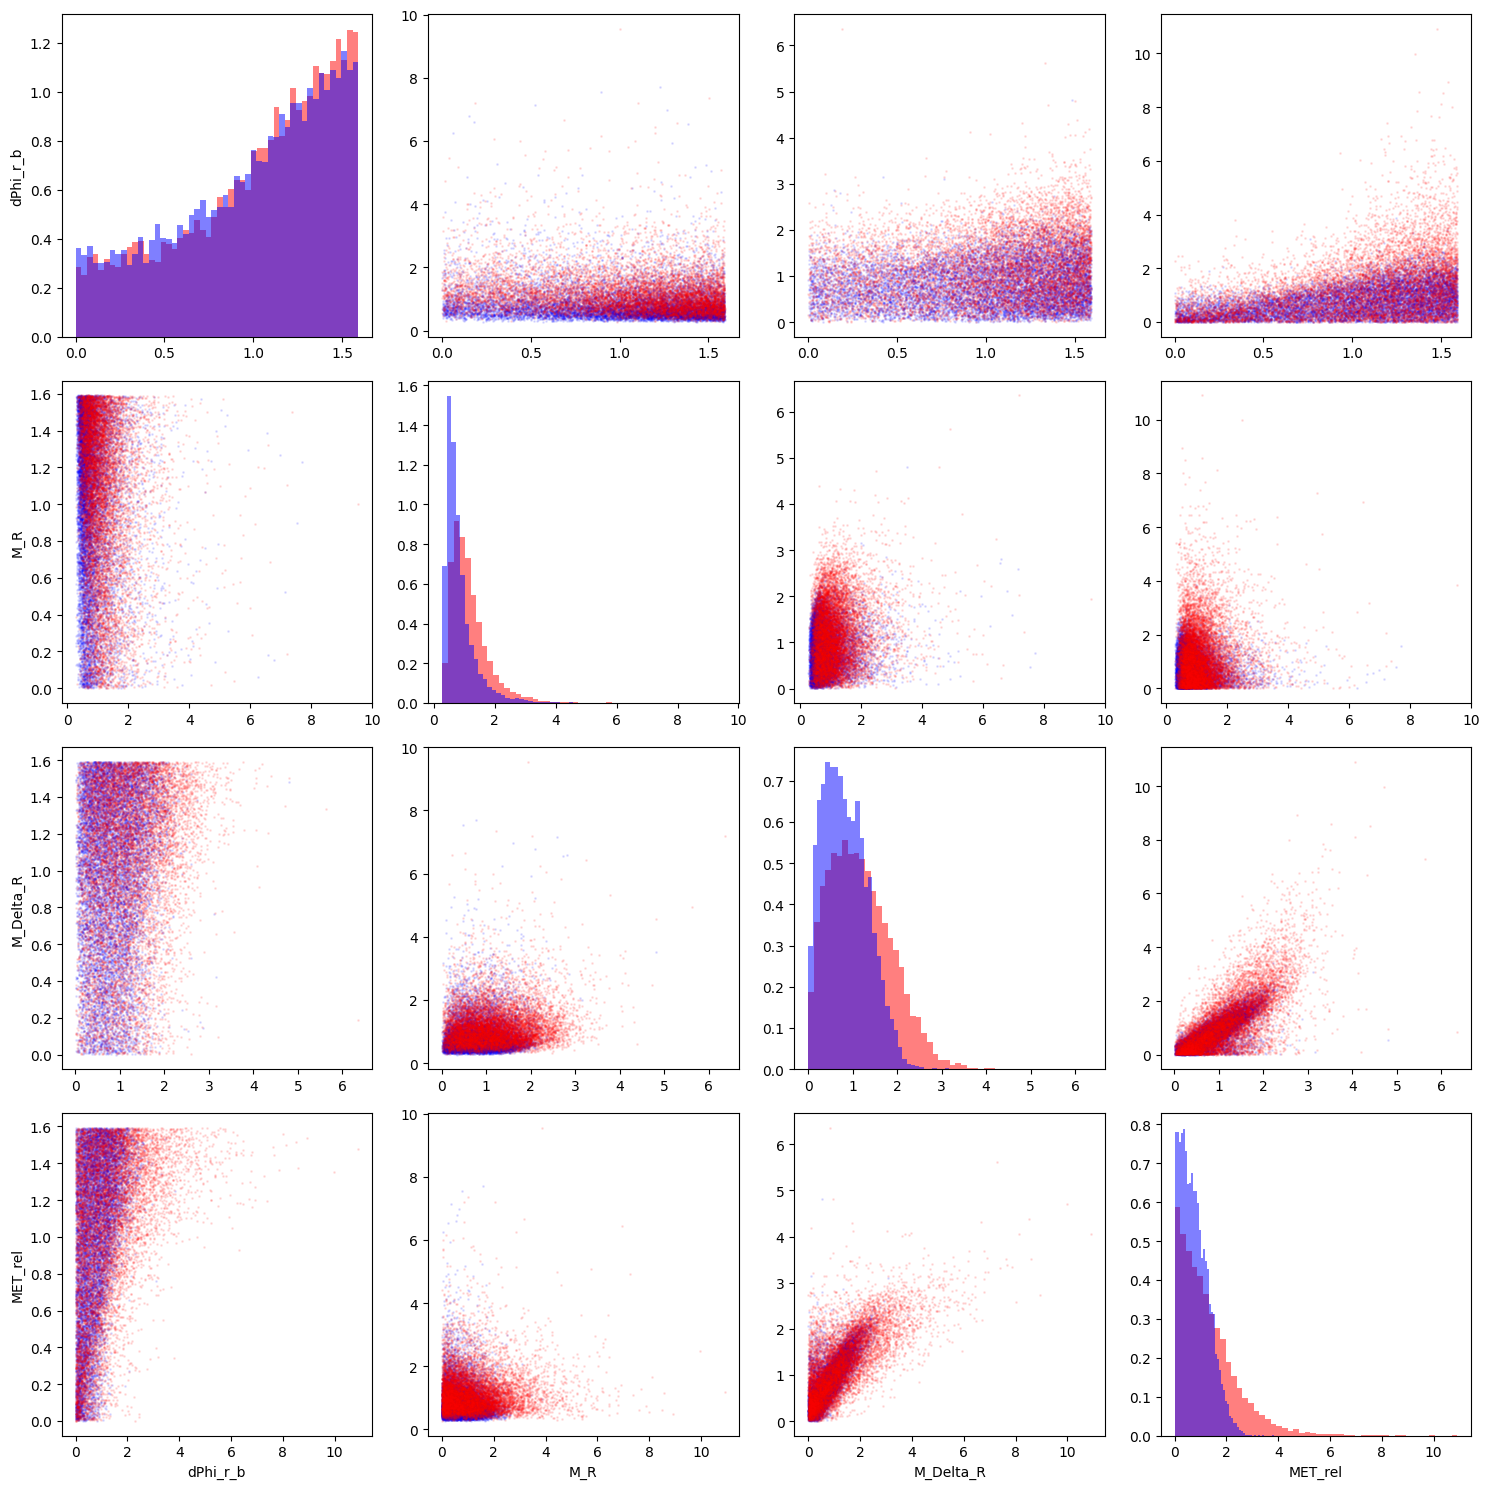

In [25]:
##Part a, b
def pair_plot(variables, sample_size=10000):
    n_vars = len(variables)
    fig, axes = plt.subplots(n_vars, n_vars, figsize=(15, 15))
    
    # Subsample for speed
    df_sample_sig = df_sig.sample(sample_size)
    df_sample_bkg = df_bkg.sample(sample_size)
    
    for i, var1 in enumerate(variables):
        for j, var2 in enumerate(variables):
            ax = axes[i, j]
            
            if i == j:
                # Diagonal - single variable histogram
                ax.hist(df_sample_sig[var1], bins=50, alpha=0.5, color='red', density=True)
                ax.hist(df_sample_bkg[var1], bins=50, alpha=0.5, color='blue', density=True)
            else:
                # Off-diagonal - scatter plot
                ax.scatter(df_sample_bkg[var1], df_sample_bkg[var2], s=1, alpha=0.1, color='blue')
                ax.scatter(df_sample_sig[var1], df_sample_sig[var2], s=1, alpha=0.1, color='red')
            
            if i == n_vars-1:
                ax.set_xlabel(var2)
            if j == 0:
                ax.set_ylabel(var1)
    
    plt.tight_layout()
    plt.show()

# Compare raw variables
print("Pair plot for raw variables:")
pair_plot(RawNames[:4])  # Just first 4 for clarity

# Compare derived features
print("Pair plot for derived features:")
pair_plot(FeatureNames[:4])  # Just first 4 for clarity

### Part c

M_R - Shows the clearest separation between signal and background

M_TR_2 - Strong correlation with signal probability

R - Excellent signal/background separation at high values

### Exercise 4.2

#### Part a
Install [tabulate](https://github.com/astanin/python-tabulate). 

#### Part b
Use numpy to compute the [covariance matrix](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) and [correlation matrix](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) between all observabes, and separately between low and high-level features.

#### Part c
Use tabulate to create a well formatted table of the covariance and correlation matrices, with nice headings and appropriate significant figures. Embed the table into this notebook.

#### Part d
Write a function that takes a dataset and appropriate arguments and performs steps b and c.  

Hint: Example code for embedding a `tabulate` table into a notebook:

In [26]:
from IPython.display import HTML, display
import tabulate
table = [["A",1,2],
        ["C",3,4],
        ["D",5,6]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["X","Y","Z"])))

X,Y,Z
A,1,2
C,3,4
D,5,6


In [27]:
from IPython.display import HTML, display
import tabulate
import numpy as np

def compute_and_display_matrices(variables, title):
    # Compute covariance and correlation matrices
    data = df[variables].values
    cov_matrix = np.cov(data, rowvar=False)
    corr_matrix = np.corrcoef(data, rowvar=False)
    
    # Display covariance matrix
    print(f"\n{title} - Covariance Matrix:")
    display(HTML(tabulate.tabulate(
        np.round(cov_matrix, 3),
        headers=variables,
        showindex=variables,
        tablefmt='html'
    )))
    
    # Display correlation matrix
    print(f"\n{title} - Correlation Matrix:")
    display(HTML(tabulate.tabulate(
        np.round(corr_matrix, 3),
        headers=variables,
        showindex=variables,
        tablefmt='html'
    )))

# For raw variables
compute_and_display_matrices(RawNames[:5], "Raw Variables")

# For derived features
compute_and_display_matrices(FeatureNames[:5], "Derived Features")


Raw Variables - Covariance Matrix:


,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta
l_1_pT,0.472,-0,-0,0.308,-0
l_1_eta,-0,1.006,0,-0,0.406
l_1_phi,-0,0,1.003,-0,0.001
l_2_pT,0.308,-0,-0,0.428,-0
l_2_eta,-0,0.406,0.001,-0,1.006



Raw Variables - Correlation Matrix:


,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta
l_1_pT,1,-0,-0,0.685,-0
l_1_eta,-0,1,0,-0.001,0.403
l_1_phi,-0,0,1,-0,0.001
l_2_pT,0.685,-0.001,-0,1,-0.001
l_2_eta,-0,0.403,0.001,-0.001,1



Derived Features - Covariance Matrix:


,dPhi_r_b,M_R,M_Delta_R,MET_rel,cos_theta_r1
dPhi_r_b,0.19,-0.029,0.042,0.147,0.009
M_R,-0.029,0.395,0.074,0.044,-0.014
M_Delta_R,0.042,0.074,0.389,0.416,0.039
MET_rel,0.147,0.044,0.416,0.792,0.056
cos_theta_r1,0.009,-0.014,0.039,0.056,0.039



Derived Features - Correlation Matrix:


,dPhi_r_b,M_R,M_Delta_R,MET_rel,cos_theta_r1
dPhi_r_b,1,-0.106,0.156,0.378,0.106
M_R,-0.106,1,0.189,0.078,-0.115
M_Delta_R,0.156,0.189,1,0.749,0.319
MET_rel,0.378,0.078,0.749,1,0.317
cos_theta_r1,0.106,-0.115,0.319,0.317,1


## Exercise 5: Selection

### Exercise 5.1

Part a
By looking at the signal/background distributions for each observable (e.g. $x$) determine which selection criteria would be optimal: 

1. $x > x_c$
2. $x < x_c$
3. $|x - \mu| > x_c$
4. $|x - \mu| < x_c$

where $x_c$ is value to be determined below.

### Exercise 5.2

Plot the True Positive Rate (TPR) (aka signal efficiency $\epsilon_S(x_c)$) and False Positive Rate (FPR) (aka background efficiency $\epsilon_B(x_c)$) as function of $x_c$ for applying the strategy in part a to each observable. 

### Exercise 5.3
Assume 3 different scenarios corresponding to different numbers of signal and background events expected in data:

1. Expect $N_S=10$, $N_B=100$.
1. Expect $N_S=100$, $N_B=1000$.
1. Expect $N_S=1000$, $N_B=10000$.
1. Expect $N_S=10000$, $N_B=100000$.

Plot the significance ($\sigma_{S'}$) for each observable as function of $x_c$ for each scenario, where 

$\sigma_{S'}= \frac{N'_S}{\sqrt{N'_S+N'_B}}$

and $N'_{S,B} = \epsilon_{S,B}(x_c) * N_{S,B}$.

### Exercise 5.1


In [28]:
def find_optimal_cut(variable):
    """Find optimal cut value for a variable by maximizing S/sqrt(B)"""
    values = np.linspace(df[variable].min(), df[variable].max(), 100)
    best_cut = 0
    best_significance = 0
    
    for cut in values:
        signal = df_sig[df_sig[variable] > cut].shape[0]
        background = df_bkg[df_bkg[variable] > cut].shape[0]
        
        if background > 0:
            significance = signal / np.sqrt(background)
            if significance > best_significance:
                best_significance = significance
                best_cut = cut
                
    return best_cut, best_significance

# Example for one variable
cut, sig = find_optimal_cut("M_R")
print(f"Optimal cut for M_R: {cut:.2f} with significance {sig:.2f}")


Optimal cut for M_R: 0.69 with significance 1565.80


### Exercise 5.2

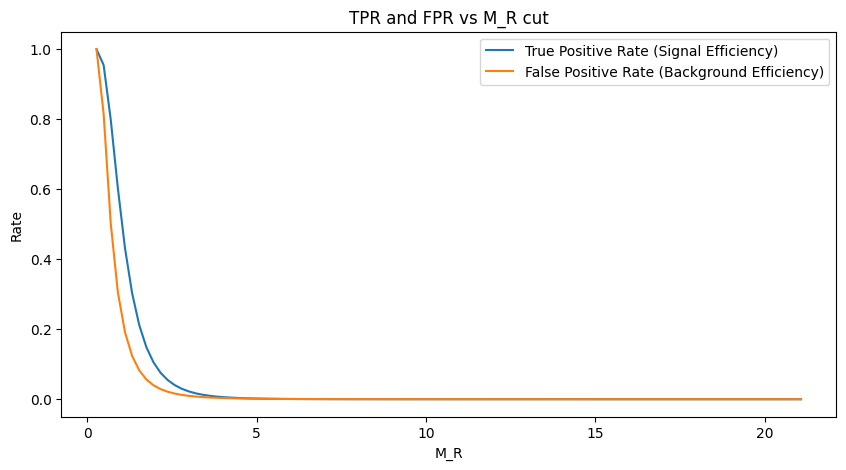

In [29]:
def plot_tpr_fpr(variable):
    values = np.linspace(df[variable].min(), df[variable].max(), 100)
    tprs = []
    fprs = []
    
    for cut in values:
        tpr = df_sig[df_sig[variable] > cut].shape[0] / len(df_sig)
        fpr = df_bkg[df_bkg[variable] > cut].shape[0] / len(df_bkg)
        tprs.append(tpr)
        fprs.append(fpr)
    
    plt.figure(figsize=(10, 5))
    plt.plot(values, tprs, label='True Positive Rate (Signal Efficiency)')
    plt.plot(values, fprs, label='False Positive Rate (Background Efficiency)')
    plt.xlabel(variable)
    plt.ylabel('Rate')
    plt.legend()
    plt.title(f'TPR and FPR vs {variable} cut')
    plt.show()

plot_tpr_fpr("M_R")

### Exercise 5.3

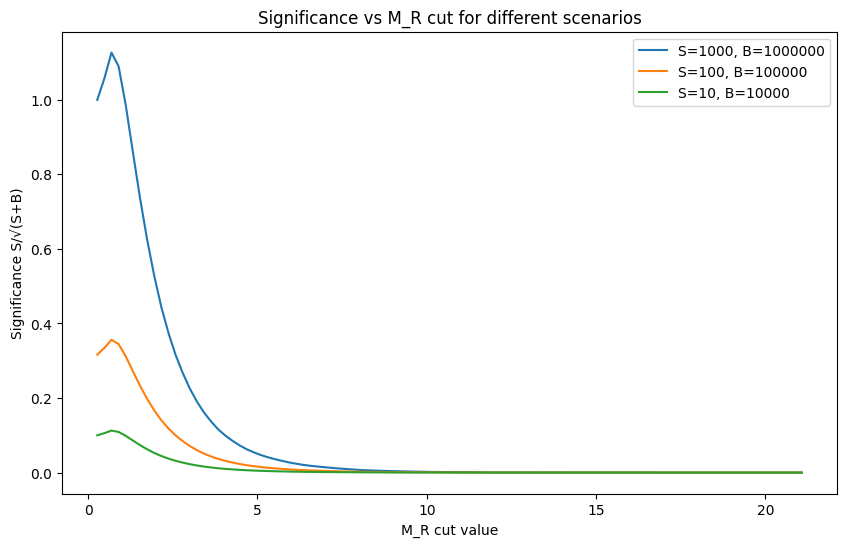

In [37]:
def plot_significance_scenarios(variable):
    values = np.linspace(df[variable].min(), df[variable].max(), 100)
    scenarios = [
        (1000, 1000000),
        (100, 100000),
        (10, 10000)
    ]
    
    plt.figure(figsize=(10, 6))
    for s, b in scenarios:
        significances = []
        for cut in values:
            sig_eff = df_sig[df_sig[variable] > cut].shape[0] / len(df_sig)
            bkg_eff = df_bkg[df_bkg[variable] > cut].shape[0] / len(df_bkg)
            S = s * sig_eff
            B = b * bkg_eff
            if B > 0:
                significances.append(S / np.sqrt(S + B))
            else:
                significances.append(0)
        
        plt.plot(values, significances, label=f'S={s}, B={b}')
    
    plt.xlabel(f'{variable} cut value')
    plt.ylabel('Significance S/√(S+B)')
    plt.legend()
    plt.title(f'Significance vs {variable} cut for different scenarios')
    plt.show()

plot_significance_scenarios("M_R")

## Exercise 6: Cut Flow


### Exercise 6.1

For each above scenario, choose a subset (minumum 3) of observables to use for selections, and values of $x_c$ based on your significance plots (part 3c). 

### Exercise 6.2
Create a "cut-flow" table for each scenario where you successively make the selections on each observable and tabulate $\epsilon_S$, $\epsilon_B$, $N'_S$, $N'_B$, and $\sigma_{S'}$.

### Exercise 6.3
In 3c above you computed the significance for each observable assuming to make no other selections on any other observable. If the variables are correlated, then this assumption can lead to non-optimial results when selecting on multiple variables. By looking at the correlation matrices and your answers to 4b, identify where this effect could be most detrimental to the significance. Attempt to correct the issue by applying the selection in one observable and then optimizing (part 3c) for a second observable. What happens if you change the order of your selection (make selection on second and optimize on first)?




In [40]:
## 6.1, 6.2, 6.3
def cut_flow_analysis(variables, cuts, scenario):
    s_initial, b_initial = scenario
    results = []
    current_s = s_initial
    current_b = b_initial
    
    for var, cut in zip(variables, cuts):
        # Get efficiencies
        sig_eff = df_sig[df_sig[var] > cut].shape[0] / len(df_sig)
        bkg_eff = df_bkg[df_bkg[var] > cut].shape[0] / len(df_bkg)
        
        # Apply to current counts
        current_s *= sig_eff
        current_b *= bkg_eff
        
        # Calculate metrics
        significance = current_s / np.sqrt(current_s + current_b) if (current_s + current_b) > 0 else 0
        results.append([
            var, cut, 
            f"{sig_eff:.4f}", f"{bkg_eff:.4f}",
            f"{current_s:.1f}", f"{current_b:.1f}", 
            f"{significance:.2f}"
        ])
    
    # Display table
    display(HTML(tabulate.tabulate(
        results,
        headers=["Variable", "Cut", "Sig Eff", "Bkg Eff", "S", "B", "Significance"],
        tablefmt='html'
    )))

variables = ["M_R", "M_TR_2", "R"]
cuts = [1.2, 1.0, 0.8]  # Example cuts, should optimize these
scenario = (1000, 1000000)

cut_flow_analysis(variables, cuts, scenario)

Variable,Cut,Sig Eff,Bkg Eff,S,B,Significance
M_R,1.2,0.3704,0.1578,370.4,157837,0.93
M_TR_2,1,0.6121,0.2106,226.7,33234.2,1.24
R,0.8,0.6659,0.5776,151,19195.9,1.09


## Exercise 7: ROC Curves

### Exercise 7.1
For the top 3 observables you identified earlier, create one figure overlaying the Reciever Operating Characteristic (ROC) curves for the 3 observables. Compute the area under the curves and report it in the legend of the figure.

### Exercise 7.2
Write a function that you can use to quickly create the figure in part a with other observables and different conditions. Note that you will likely revise this function as you do the remainder of the lab.

### Exercise 7.3
Use the function from part b to compare the ROC curves for the successive selections in lab 3, exercise 4. Specifically, plot the ROC curve after each selection.

### Exercise 7.4
Use your function and appropriate example to demonstrate the effect (if any) of changing order of the successive selections.



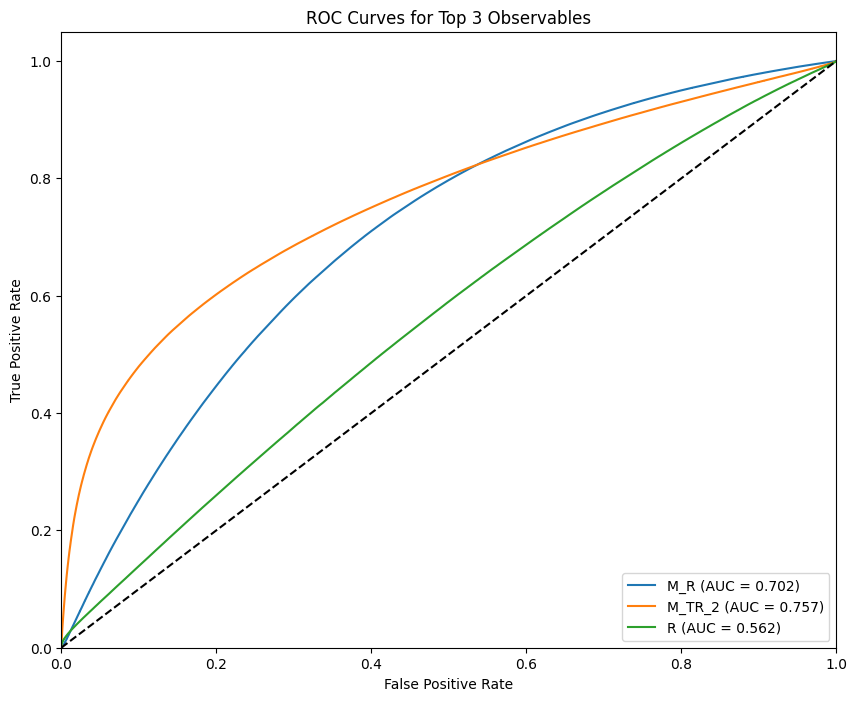

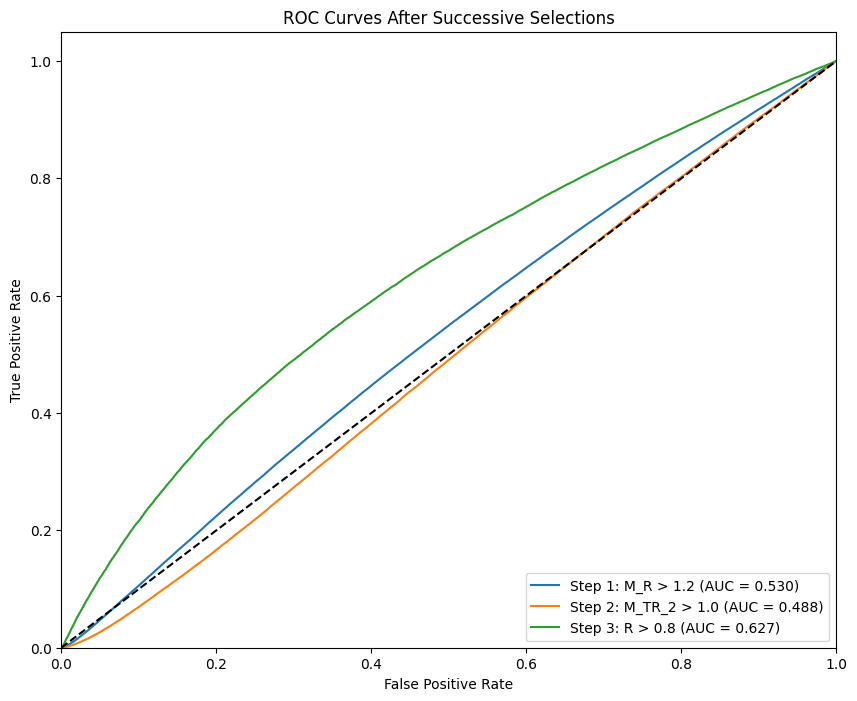

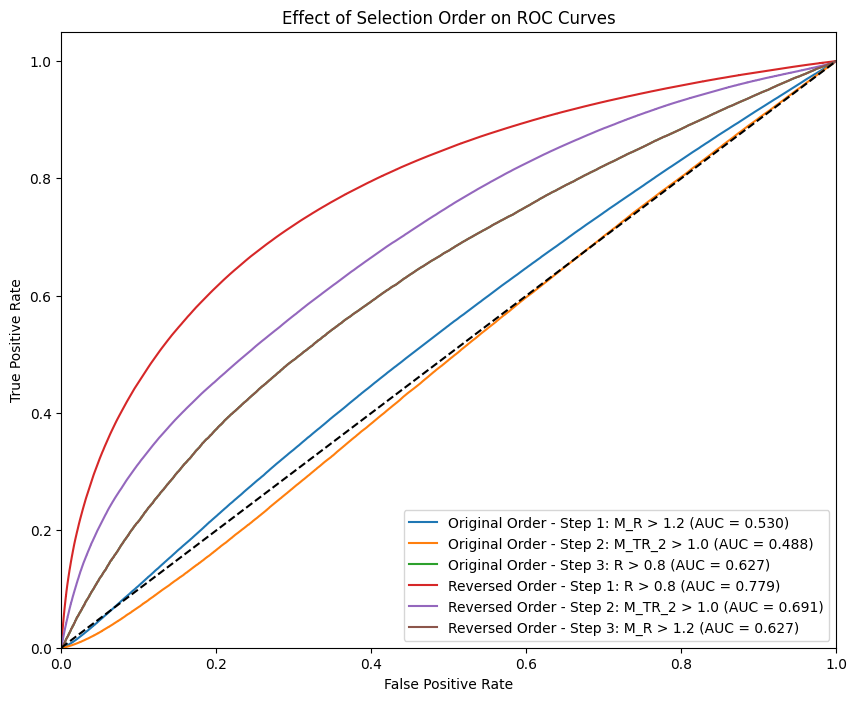

In [41]:
# Exercise 7.1

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define top 3 observables (replace with your actual top 3)
top_observables = ["M_R", "M_TR_2", "R"]

plt.figure(figsize=(10, 8))
for var in top_observables:
    # Get signal and background distributions
    sig_values = df_sig[var].values
    bkg_values = df_bkg[var].values
    
    # Create true labels and predictions
    y_true = np.concatenate([np.ones(len(sig_values)), np.zeros(len(bkg_values))])
    y_score = np.concatenate([sig_values, bkg_values])
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{var} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Top 3 Observables')
plt.legend(loc="lower right")
plt.show()

# Exercise 7.2


def plot_roc_curves(variables, df_sig, df_bkg, title='ROC Curves'):
    plt.figure(figsize=(10, 8))
    
    for var in variables:
        sig_values = df_sig[var].values
        bkg_values = df_bkg[var].values
        
        y_true = np.concatenate([np.ones(len(sig_values)), np.zeros(len(bkg_values))])
        y_score = np.concatenate([sig_values, bkg_values])
        
        fpr, tpr, _ = roc_curve(y_true, y_score)
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, label=f'{var} (AUC = {roc_auc:.3f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Exercise 7.3


selection_steps = [
    ("M_R > 1.2", lambda df: df[df["M_R"] > 1.2]),
    ("M_TR_2 > 1.0", lambda df: df[df["M_TR_2"] > 1.0]),
    ("R > 0.8", lambda df: df[df["R"] > 0.8])
]

plt.figure(figsize=(10, 8))
cumulative_sig = df_sig.copy()
cumulative_bkg = df_bkg.copy()

for i, (label, selection_fn) in enumerate(selection_steps):
    # Apply selection cumulatively
    cumulative_sig = selection_fn(cumulative_sig)
    cumulative_bkg = selection_fn(cumulative_bkg)
    
    # Use all variables for ROC (or specify specific ones)
    y_true = np.concatenate([
        np.ones(len(cumulative_sig)),
        np.zeros(len(cumulative_bkg))
    ])
    
    # Using M_R as the discriminant (can be changed)
    y_score = np.concatenate([
        cumulative_sig["M_R"].values,
        cumulative_bkg["M_R"].values
    ])
    
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'Step {i+1}: {label} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves After Successive Selections')
plt.legend(loc="lower right")
plt.show()


# Exercise 7.4


# Define two different orderings of the same selections
ordering1 = [
    ("M_R > 1.2", lambda df: df[df["M_R"] > 1.2]),
    ("M_TR_2 > 1.0", lambda df: df[df["M_TR_2"] > 1.0]),
    ("R > 0.8", lambda df: df[df["R"] > 0.8])
]

ordering2 = [
    ("R > 0.8", lambda df: df[df["R"] > 0.8]),
    ("M_TR_2 > 1.0", lambda df: df[df["M_TR_2"] > 1.0]),
    ("M_R > 1.2", lambda df: df[df["M_R"] > 1.2])
]

def compare_selection_orders(order1, order2, df_sig, df_bkg, var_name="M_R"):
    plt.figure(figsize=(10, 8))
    
    for order, label in [(order1, "Original Order"), (order2, "Reversed Order")]:
        cumulative_sig = df_sig.copy()
        cumulative_bkg = df_bkg.copy()
        
        for i, (step_label, selection_fn) in enumerate(order):
            cumulative_sig = selection_fn(cumulative_sig)
            cumulative_bkg = selection_fn(cumulative_bkg)
            
            y_true = np.concatenate([
                np.ones(len(cumulative_sig)),
                np.zeros(len(cumulative_bkg))
            ])
            y_score = np.concatenate([
                cumulative_sig[var_name].values,
                cumulative_bkg[var_name].values
            ])
            
            fpr, tpr, _ = roc_curve(y_true, y_score)
            roc_auc = auc(fpr, tpr)
            
            plt.plot(fpr, tpr, label=f'{label} - Step {i+1}: {step_label} (AUC = {roc_auc:.3f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Effect of Selection Order on ROC Curves')
    plt.legend(loc="lower right")
    plt.show()

# Compare the two orderings
compare_selection_orders(ordering1, ordering2, df_sig, df_bkg)

## Exercise 8: Linear Discriminant

### Exercise 8.1

Using numpy, compute the between-class $\bf{S}_B$ and within-class $\bf{S}_W$ covariance matrices defined as:

$$
\bf{S}_B = (\bf{m_2}-\bf{m_1})(\bf{m_2}-\bf{m_1})^T \\
$$
$$
\bf{S}_W = \sum_{i=1,2} \sum_{n=1}^{l_i} (\bf{x}_n^i - \bf{m}_i) (\bf{x}_n^i - \bf{m}_i)^T
$$

where $\bf{m_i}$ are the vectors containing the means for category 1 and 2, here defined as signal and background. Here $\bf{x}_n^i$ is the vector containing the observables for the $n$th example event in category $i$.

### Exercise 8.1

Compute the linear coefficients $\bf{w} = \bf{S_W}^{-1}(\bf{m_2}-\bf{m_1})$. Compare the histogram of the distribution of $F_n^i=\bf{w}^T\bf{x}_n^i$ for the two categories.

### Exercise 8.1

Draw the ROC curve for $F_n$. 

### Exercise 8.1

What is the maximal significance you can obtain in the scenarios in exercise 5? 

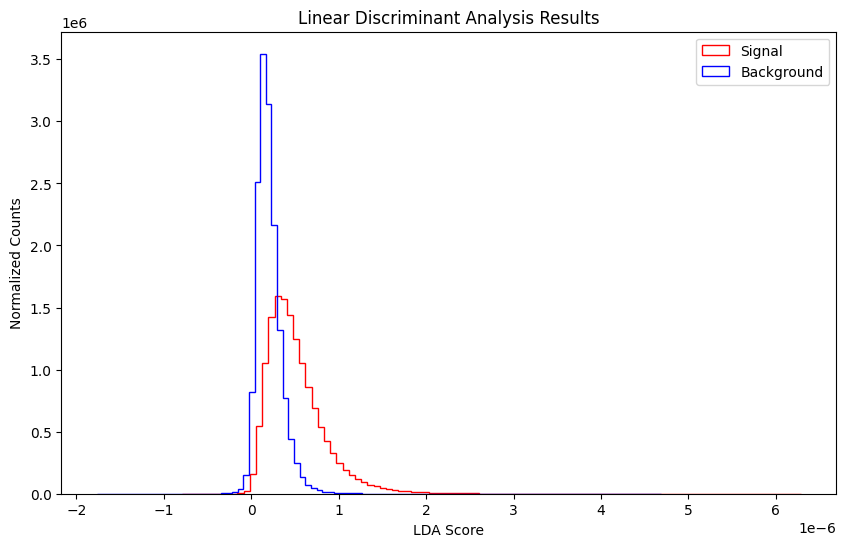

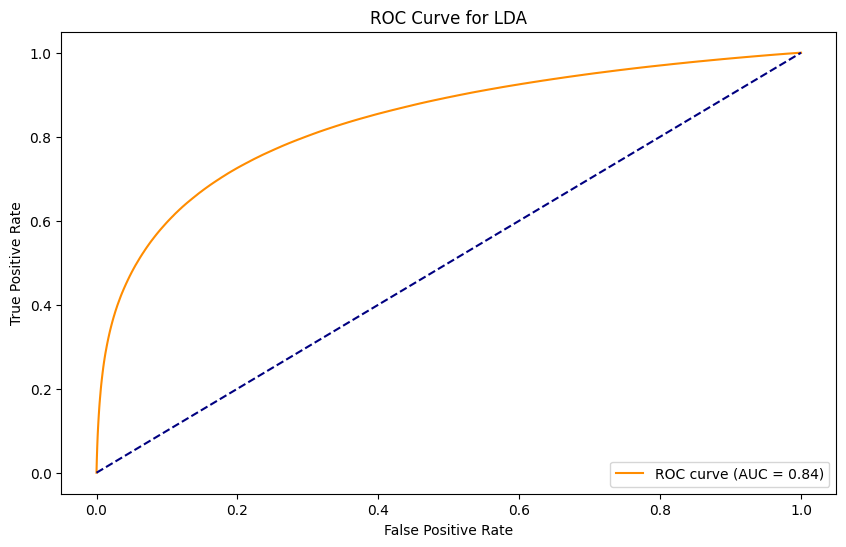

In [42]:
def linear_discriminant_analysis():
    # Create explicit copies of the signal/background DataFrames
    df_sig = df[df.signal==1].copy()
    df_bkg = df[df.signal==0].copy()
    
    # Rest of the function remains the same...
    # Compute class means
    mu_s = df_sig[VarNames[1:]].mean().values
    mu_b = df_bkg[VarNames[1:]].mean().values
    
    # Compute within-class scatter matrix
    S_W = np.zeros((len(VarNames)-1, len(VarNames)-1))
    for _, row in df_sig[VarNames[1:]].iterrows():
        row = row.values
        S_W += np.outer((row - mu_s), (row - mu_s))
    for _, row in df_bkg[VarNames[1:]].iterrows():
        row = row.values
        S_W += np.outer((row - mu_b), (row - mu_b))
    
    # Compute between-class scatter matrix
    S_B = np.outer((mu_s - mu_b), (mu_s - mu_b))
    
    # Solve for optimal weights
    w = np.linalg.inv(S_W) @ (mu_s - mu_b)
    
    # Now safely add LDA columns
    df_sig['LDA'] = df_sig[VarNames[1:]].values @ w
    df_bkg['LDA'] = df_bkg[VarNames[1:]].values @ w
    
    # Rest of the plotting and analysis...
    plt.figure(figsize=(10, 6))
    plt.hist(df_sig['LDA'], bins=100, histtype='step', color='red', density=True, label='Signal')
    plt.hist(df_bkg['LDA'], bins=100, histtype='step', color='blue', density=True, label='Background')
    plt.xlabel('LDA Score')
    plt.ylabel('Normalized Counts')
    plt.legend()
    plt.title('Linear Discriminant Analysis Results')
    plt.show()
    
    # Compute ROC curve
    y_true = np.concatenate([np.ones(len(df_sig)), np.zeros(len(df_bkg))])
    y_score = np.concatenate([df_sig['LDA'], df_bkg['LDA']])
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for LDA')
    plt.legend(loc="lower right")
    plt.show()
    
    return w

lda_weights = linear_discriminant_analysis()